
Hello, and welcome to the Decision Trees in R notebook. In this notebook, we will be going over what Decision Trees are, what they are used for, and how to utilize them in the R environment.

---

## The Classification Problem
Suppose we are lost in a forest, and are very hungry. Unable to go on without eating something first, we take a look around, only to find nothing immediately edible -- just mushrooms.

<center>
<a title="By OliBac from FRANCE [CC BY 2.0 (http://creativecommons.org/licenses/by/2.0)], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File%3AChampignons_mushrooms_(950475736).jpg"><img width="400" alt="Champignons mushrooms (950475736)" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/66/Champignons_mushrooms_%28950475736%29.jpg/512px-Champignons_mushrooms_%28950475736%29.jpg"/></a>
<font size="2">*Many different kinds of mushrooms. Are they all safe to eat?*</font>
</center>

We're starving, so anything looks great to us, but eating one of those carelessly might result in us getting poisoned. To know if we can or cannot eat a mushroom, we need to **classify it based on our knowledge of its features**, in other words, we have a classification problem on our hands.

This sort of problem is not simple to solve effectively -- there are many variables involved in correctly classifying something. There are many different kinds of mathematical models that were created to aid us in classification tasks. One of these models is the **Decision Tree model**.

The Decision Tree is a predictive model based on the analysis of a set of data points that describe the type of object we want to classify. In our example, it might be a set of observations of a mushroom's cap type, its color, odor, shape of its stalk, etc. These descriptions of our object are called **features**, and are very important in many different kinds of machine learning algorithms, including Decision Trees. The classification we want out of these features is set aside as a "result" of sorts.

<center>
<img width="680" src="https://ibm.box.com/shared/static/ar8rlcoyrs0n0kphj4g4n4rbhe76vpd9.png"/>
<font size="2">*Example of mushroom features and their classification.*</font>
</center>

From this set of observations, the Decision Tree-creating algorithm infers probabilities -- for example, if many mushrooms that have large caps are poisonous, the algorithm will assume that the probability of large-cap mushrooms being poisonous is high. When the model is complete, we have a tree-like structure composed of what are called **decision nodes**, which ask our data point questions about its features, and **leaf nodes**, which tells us what classification the decision tree thinks our data point is.

<center>
<img width="840" src="https://ibm.box.com/shared/static/urnm2onpitt8qz2296mltzcfdn1p040f.png"/></a>
<font size="2">*Example of a possible Decision Tree describing mushrooms.*</font>
</center>

So, if we create a good Decision Tree, we can follow this "workflow" of sorts to find out what's more probable. Of course, there is no way to be completely certain, but Decision Trees -- when properly created -- are surprisingly effective at what they do.

### The process of constructing the tree
Now, the question is that __how this probablities are calculated?__

let’s quickly review some terminology that can apply to decision trees. If some of these definitions don’t make sense right now, don’t worry, as we’ll be going through some examples that will clarify this.

__Node:__. In a node, we have a dataset that gets tested for a certain attribute. The goal of the node is to split the dataset on an attribute.

__Leaf node__: It is the terminal node in the tree that predicts the outcome.

__Root node__: It appears at the top of tree and contains the entire dataset for that tree.


__ How to find the best feature in each node to split 

__Entropy__: Entropy is calculated for each node. It is the amount of information disorder, or the amount of randomness in the data. The entropy in the node depends on how much random data is in that node. In decision tree we are looking for a trees that have smallest entropy in their nodes. The entropy is used to calculate the homogeneity of the samples in that node. If the samples are completely homogeneous the entropy is zero and if the sample is an equally divided it has entropy of one. It means, if all data in a node are either poisonous or edible, then the entropy is zero, but if the half of data are poisonous and other half are edible, then the entropuy is one. For example, to calculate the Entropy of our target class:  

Entropy = - p(edible)*log(p(edible)) - p(poisonous)*log(p(poisonous))

__ Information gain__: This is the information collected that can increase the level of certainty in a particular predictor (attributes). We can think of information gain and entropy as opposites. As entropy, or the amount of randomness, decreases, the information gain, or amount of certainty, increases, and vice-versa. So, constructing a decision tree is all about finding prdictors (attributes) that returns the highest information gain.

__Algorithm:__

1. Calculate entropy of the target field (the class label) for whole dataset.
2. For each attribute:
    - split the dataset on the attribute
    - calculate entropy of the target field on splited dataset, using the attribute values
    - calculate the information gain of the attribute
3. select the attribute that has the largest informmation gain
4. Branch the tree using the selected attribute
5. stop, if it is a node with entropy of 0, otherwise jump to step2.

we have our dataset at the root node consisting of 4 colors: red, blue, green, and yellow. There are 4 dots for each color, totaling 16 dots.  We’ll be using histograms to look at the chance that an out-of-sample data point would be a certain color (** Click **).



## Decision Trees in R
Now that we know what Decision Trees are, we can move on to creating them in R. To start, let's load up a data set. For this notebook, we will be using <a href=https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/>UCI's `Mushroom` dataset</a> to find out if a mushroom is poisonous or edible. Since this dataset is not inbuilt into R, we need to download it and load it into R. To download the dataset, run the code cell below.

In [14]:
download.file("https://ibm.box.com/shared/static/dpdh09s70abyiwxguehqvcq3dn0m7wve.data", "mushroom.data")

After you have finished downloading the file, we need to create a data frame to house the observations in the dataset. Since the dataset is structured using comma-separated values, we can use the `read.csv` function.

In [15]:
mushrooms <- read.csv("mushroom.data", header = F)
head(mushrooms)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23
p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


Once that's done, we have the data loaded up. However, the way that it is structured isn't the most intuitive. In the code cell below, we are adding the column names to the data frame with the `colnames` function. Additionally, since our data frame is composed of *factors*, we can rename some of these factors to something more easily understood by us using `levels`.

In [16]:
# Define column names for the mushrooms data frame.
colnames(mushrooms) <- c("Class","cap.shape","cap.surface","cap.color","bruises","odor","gill.attachment","gill.spacing",
                         "gill.size","gill.color","stalk.shape","stalk.root","stalk.surface.above.ring",
                         "stalk.surface.below.ring","stalk.color.above.ring","stalk.color.below.ring","veil.type","veil.color",
                         "ring.number","ring.type","print","population","habitat")
head(mushrooms)

Class,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,...,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.type,veil.color,ring.number,ring.type,print,population,habitat
p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [17]:
# Define the factor names for "Class"
levels(mushrooms$Class) <- c("Edible","Poisonous")

In [18]:
# Define the factor names for "odor"
levels(mushrooms$odor) <- c("Almonds","Anise","Creosote","Fishy","Foul","Musty","None","Pungent","Spicy")
# Define the factor names for "print"
levels(mushrooms$print) <- c("Black","Brown","Buff","Chocolate","Green","Orange","Purple","White","Yellow")
head(mushrooms)

Class,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,...,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.type,veil.color,ring.number,ring.type,print,population,habitat
Poisonous,x,s,n,t,None,f,c,n,k,...,s,w,w,p,w,o,p,Buff,s,u
Edible,x,s,y,t,Almonds,f,c,b,k,...,s,w,w,p,w,o,p,Chocolate,n,g
Edible,b,s,w,t,Fishy,f,c,b,n,...,s,w,w,p,w,o,p,Chocolate,n,m
Poisonous,x,y,w,t,None,f,c,n,n,...,s,w,w,p,w,o,p,Buff,s,u
Edible,x,s,g,f,Musty,f,w,b,k,...,s,w,w,p,w,o,e,Chocolate,a,g
Edible,x,y,y,t,Almonds,f,c,b,n,...,s,w,w,p,w,o,p,Buff,n,g


Now we can get to building our model proper. For Decision Trees, we are going to utilize two different, but related, libraries: `rpart` to create the decision tree, and `rpart.plot` to visualize our decision tree. To import libraries, we use the `library` function, like so:

In [19]:
# Import our required libraries
library(rpart)
library(rpart.plot)

To create our decision tree model, we can use the `rpart` function. `rpart` is simple to use: you provide it a `formula`, show it the dataset it is supposed to use and choose a `method` (either "class" for classification or "anova" for regression).

A great trick to know when handling very large structured datasets (our dataset has over 20 columns we want to use!) is that in `formula` declarations, one can use the `.` operator as a quick way of designating "all other columns" to R. You can also `print` the Decision Tree model to retrieve a summary describing it.

In [20]:
# Create a classification decision tree using "Class" as the variable we want to predict and everything else as its predictors.
myDecisionTree <- rpart(Class ~ ., data = mushrooms, method = "class")
# Print out a summary of our created model.
print(myDecisionTree)

n= 8124 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 8124 3916 Edible (0.51797144 0.48202856)  
  2) odor=Almonds,Fishy,Musty 4328  120 Edible (0.97227357 0.02772643)  
    4) print=Black,Brown,Buff,Chocolate,Green,Purple,White,Yellow 4256   48 Edible (0.98872180 0.01127820) *
    5) print=Orange 72    0 Poisonous (0.00000000 1.00000000) *
  3) odor=Anise,Creosote,Foul,None,Pungent,Spicy 3796    0 Poisonous (0.00000000 1.00000000) *


Now that we have our model, we can draw it to gain a better understanding of how it is classifying the data points. We can use the `rpart.plot` function -- a specialized function for plotting trees -- to render our model. This function takes on some parameters for visualizing the tree in different ways -- try changing the `type` (from 1 to 4) parameter to see what happens!

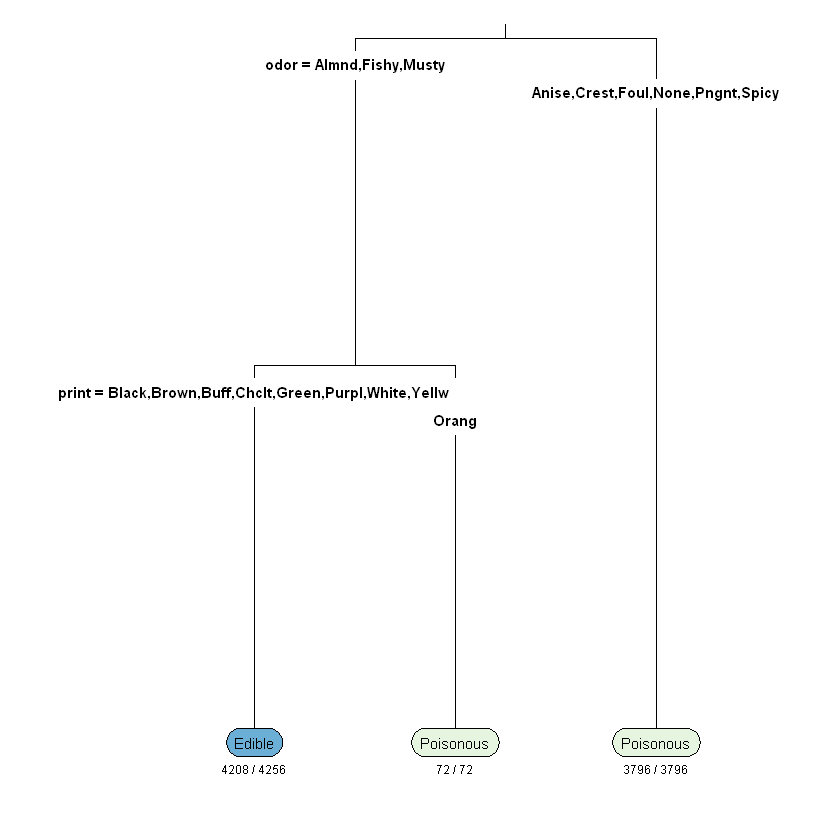

In [21]:
rpart.plot(myDecisionTree, type = 3, extra = 2, under = TRUE, faclen=5, cex = .75)

As we can see (under the classification results), our decision tree has perfect accuracy when classifying poisonous mushrooms, and almost perfect accuracy when dealing with edible ones!



In [22]:
newCase  <- mushrooms[10,-1]
newCase

,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,stalk.shape,...,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.type,veil.color,ring.number,ring.type,print,population,habitat
10,b,s,y,t,Almonds,f,c,b,g,e,...,s,w,w,p,w,o,p,Buff,s,m


In [23]:
predict(myDecisionTree, newCase, type = "class")

10 
Edible 
Levels: Edible Poisonous

### How accurate our model is?

In [25]:
n = 8124
train_ind <- sample(c(1:n), size = 10)

In [26]:
## 75% of the sample size
n <- nrow(mushrooms)
smp_size <- floor(0.75 * n)

## set the seed to make your partition reproductible
set.seed(123)
train_ind <- sample(c(1:n), size = smp_size)

mushrooms_train <- mushrooms[train_ind, ]
mushrooms_test <- mushrooms[-train_ind, ]

In [27]:
newDT <- rpart(Class ~ ., data = mushrooms_train, method = "class")

In [28]:
result <- predict(newDT, mushrooms_test[,-1], type = "class")

In [29]:
head(result)

3         4         7         8        10        11 
   Edible Poisonous    Edible    Edible    Edible    Edible 
Levels: Edible Poisonous

In [30]:
head(mushrooms_test$Class)

[1] Edible    Poisonous Edible    Edible    Edible    Edible   
Levels: Edible Poisonous

In [33]:
conf_mat <- table(mushrooms_test$Class, result)
conf_mat

           result
            Edible Poisonous
  Edible      1068         0
  Poisonous     15       948

In [34]:
cat("Test accuracy: ", sum(diag(conf_mat))/sum(conf_mat))

Test accuracy:  0.9926145